## Exploratory Data Analysis

In [2]:
# Standard libraries
import importlib
import warnings

# Data handling and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

# UCI ML repository interface and helper scripts
import ucimlrepo
from ucimlrepo import fetch_ucirepo
import helper # Custom helper functions (must be in the working directory)
from helper import custom_describe # Custom descriptive stats function from helper.py

# Reload the helper module to reflect any recent changes
importlib.reload(helper) 

# Suppress all warnings to keep the output clean
warnings.filterwarnings('ignore')

In [3]:
# Fetch dataset from UCI repository
edu_dataset = fetch_ucirepo(id=697)

# Extract features and targets 
X = edu_dataset.data.features
y = edu_dataset.data.targets

# combining features and targets into a df
df = pd.concat([X,y], axis=1)

In [4]:
# Display the shape of the DataFrame: (rows, columns)
df.shape

(4424, 37)

In [5]:
# Checking the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital Status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [6]:
# Checking for unique values 
df.nunique()

Marital Status                                      6
Application mode                                   18
Application order                                   8
Course                                             17
Daytime/evening attendance                          2
Previous qualification                             17
Previous qualification (grade)                    101
Nacionality                                        21
Mother's qualification                             29
Father's qualification                             34
Mother's occupation                                32
Father's occupation                                46
Admission grade                                   620
Displaced                                           2
Educational special needs                           2
Debtor                                              2
Tuition fees up to date                             2
Gender                                              2
Scholarship holder          

In [7]:
# Checking for missing values 
df.isnull().sum()

Marital Status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

In [8]:
# Renaming columns for better readibility and acessebility  
df.rename(columns={
    'Marital Status': 'marital_status',
    'Application mode': 'application_mode',
    'Application order': 'application_order',
    'Course': 'course',
    'Daytime/evening attendance': 'attendance_type',
    'Previous qualification': 'prev_qualification',
    'Previous qualification (grade)': 'prev_qualification_grade',
    'Nacionality': 'nationality',
    "Mother's qualification": 'mother_qualification',
    "Father's qualification": 'father_qualification',
    "Mother's occupation": 'mother_occupation',
    "Father's occupation": 'father_occupation',
    'Admission grade': 'admission_grade',
    'Displaced': 'displaced',
    'Educational special needs': 'special_needs',
    'Debtor': 'debt',
    'Tuition fees up to date': 'fees_up_to_date',
    'Gender': 'gender',
    'Scholarship holder': 'scholarship_holder',
    'Age at enrollment': 'age_at_enrollment',
    'International': 'international',
    'Curricular units 1st sem (credited)': 'first_sem_credited',
    'Curricular units 1st sem (enrolled)': 'first_sem_enrolled',
    'Curricular units 1st sem (evaluations)': 'first_sem_evaluations',
    'Curricular units 1st sem (approved)': 'first_sem_approved',
    'Curricular units 1st sem (grade)': 'first_sem_grade',
    'Curricular units 1st sem (without evaluations)': 'first_sem_no_evaluations',
    'Curricular units 2nd sem (credited)': 'second_sem_credited',
    'Curricular units 2nd sem (enrolled)': 'second_sem_enrolled',
    'Curricular units 2nd sem (evaluations)': 'second_sem_evaluations',
    'Curricular units 2nd sem (approved)': 'second_sem_approved',
    'Curricular units 2nd sem (grade)': 'second_sem_grade',
    'Curricular units 2nd sem (without evaluations)': 'second_sem_no_evaluations',
    'Unemployment rate': 'unemployment_rate',
    'Inflation rate': 'inflation_rate',
    'GDP': 'gdp',
    'Target': 'target'
}, inplace=True)

In [9]:
# Checking the column names
df.columns

Index(['marital_status', 'application_mode', 'application_order', 'course',
       'attendance_type', 'prev_qualification', 'prev_qualification_grade',
       'nationality', 'mother_qualification', 'father_qualification',
       'mother_occupation', 'father_occupation', 'admission_grade',
       'displaced', 'special_needs', 'debt', 'fees_up_to_date', 'gender',
       'scholarship_holder', 'age_at_enrollment', 'international',
       'first_sem_credited', 'first_sem_enrolled', 'first_sem_evaluations',
       'first_sem_approved', 'first_sem_grade', 'first_sem_no_evaluations',
       'second_sem_credited', 'second_sem_enrolled', 'second_sem_evaluations',
       'second_sem_approved', 'second_sem_grade', 'second_sem_no_evaluations',
       'unemployment_rate', 'inflation_rate', 'gdp', 'target'],
      dtype='object')

## Descriptive Analysis

#### Demographic Data 

In [12]:
# creating a list with demographic data
features_demo = ['marital_status', 'nationality', 'displaced', 'gender', 'age_at_enrollment', 'international']

# calling the custom describe function 
df_demo_summary = helper.custom_describe(df, features_demo)

,Distrib.,Mean,Median,Dispersion,Min.,Max.
Attribute,,,,,,
marital_status,,1.179,1.0,0.606,1,6
nationality,,1.873,1.0,6.915,1,109
displaced,,0.548,1.0,0.498,0,1
gender,,0.352,0.0,0.478,0,1
age_at_enrollment,,23.265,20.0,7.588,17,70
international,,0.025,0.0,0.156,0,1

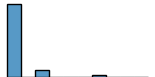
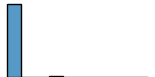
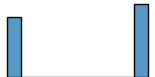
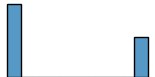
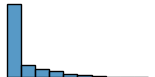
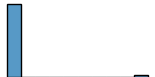

In [13]:
# displaying the output
df_demo_summary

#### Socio-economic Data

In [15]:
# creatring a list with socio-econ data
features_socio = ['mother_qualification', 'father_qualification',
                  'mother_occupation', 'father_occupation',
                  'special_needs', 'debt', 'fees_up_to_date',
                  'scholarship_holder']

# calling the custom describe function
df_socio_summary = custom_describe(df, features_socio)

,Distrib.,Mean,Median,Dispersion,Min.,Max.
Attribute,,,,,,
mother_qualification,,19.562,19.0,15.603,1,44
father_qualification,,22.275,19.0,15.343,1,44
mother_occupation,,10.961,5.0,26.418,0,194
father_occupation,,11.032,7.0,25.263,0,195
special_needs,,0.012,0.0,0.107,0,1
debt,,0.114,0.0,0.317,0,1
fees_up_to_date,,0.881,1.0,0.324,0,1
scholarship_holder,,0.248,0.0,0.432,0,1

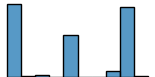
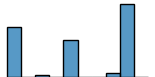
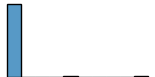
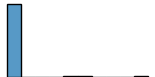
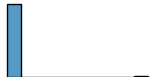
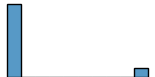
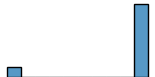
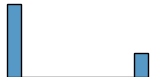

In [16]:
# displaying the output 
df_socio_summary

#### Macroeconomy Data

In [18]:
# creating a list with macrecoconomy data
features_macro = ['unemployment_rate', 'inflation_rate', 'gdp']

# calling the custom describe function 
df_macro_summary = custom_describe(df, features_macro)

,Distrib.,Mean,Median,Dispersion,Min.,Max.
Attribute,,,,,,
unemployment_rate,,11.566,11.10,2.664,7.60,16.20
inflation_rate,,1.228,1.40,1.383,-0.80,3.70
gdp,,0.002,0.32,2.270,-4.06,3.51

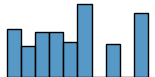
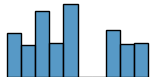
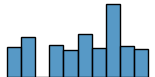

In [19]:
# displaying the output
df_macro_summary

#### Academic Data at Enrollment 

In [21]:
# creating a list with academic data
features_acad = ['application_mode', 'application_order', 'course',
                'attendance_type', 'prev_qualification']

# calling the custom describe function 
df_acad_summary = custom_describe(df, features_acad)

,Distrib.,Mean,Median,Dispersion,Min.,Max.
Attribute,,,,,,
application_mode,,18.669,17.0,17.485,1,57
application_order,,1.728,1.0,1.314,0,9
course,,8856.643,9238.0,2063.566,33,9991
attendance_type,,0.891,1.0,0.312,0,1
prev_qualification,,4.578,1.0,10.217,1,43

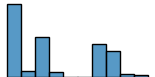
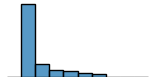
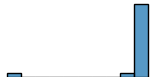
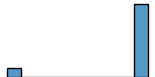
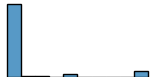

In [22]:
# displaying the output 
df_acad_summary

#### Academic Data (End of First Semester)

In [24]:
# creating a list with academic data
features_acad1 = ['first_sem_credited', 'first_sem_enrolled', 
                  'first_sem_evaluations','first_sem_approved', 
                  'first_sem_grade', 'first_sem_no_evaluations']

# calling the custom describe function
df_acad1_summary = custom_describe(df, features_acad1)

,Distrib.,Mean,Median,Dispersion,Min.,Max.
Attribute,,,,,,
first_sem_credited,,0.710,0.000,2.361,0.0,20.000
first_sem_enrolled,,6.271,6.000,2.480,0.0,26.000
first_sem_evaluations,,8.299,8.000,4.179,0.0,45.000
first_sem_approved,,4.707,5.000,3.094,0.0,26.000
first_sem_grade,,10.641,12.286,4.844,0.0,18.875
first_sem_no_evaluations,,0.138,0.000,0.691,0.0,12.000

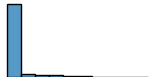
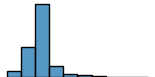
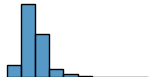
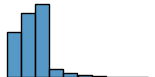
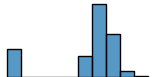
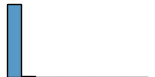

In [25]:
# displaying the output 
df_acad1_summary

#### Academic Data (End of Second Semester)

In [27]:
# creating a list with academic data
features_acad2 = [ 'second_sem_credited', 'second_sem_enrolled', 'second_sem_evaluations',
                  'second_sem_approved', 'second_sem_grade', 'second_sem_no_evaluations']

# calling the custom describe function
df_acad2_summary = custom_describe(df, features_acad2)

,Distrib.,Mean,Median,Dispersion,Min.,Max.
Attribute,,,,,,
second_sem_credited,,0.542,0.0,1.919,0.0,19.000
second_sem_enrolled,,6.232,6.0,2.196,0.0,23.000
second_sem_evaluations,,8.063,8.0,3.948,0.0,33.000
second_sem_approved,,4.436,5.0,3.015,0.0,20.000
second_sem_grade,,10.230,12.2,5.211,0.0,18.571
second_sem_no_evaluations,,0.150,0.0,0.754,0.0,12.000

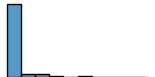
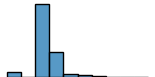
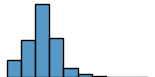
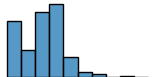
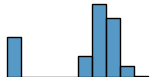
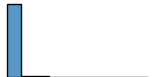

In [28]:
# displaying the output 
df_acad2_summary

#### Distribution of Target Variable

In [30]:
target = ['target']

# calling the custom describe function
df_target_summary = custom_describe(df, target)

,Distrib.,Mode,Unique
Attribute,,,
target,,Graduate,3

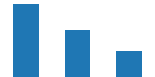

In [31]:
# displaying the output 
df_target_summary

We notice that there is data imbalance. 

### Imbalanced Data

#### Distribtuion of Student Outcomes (Target)

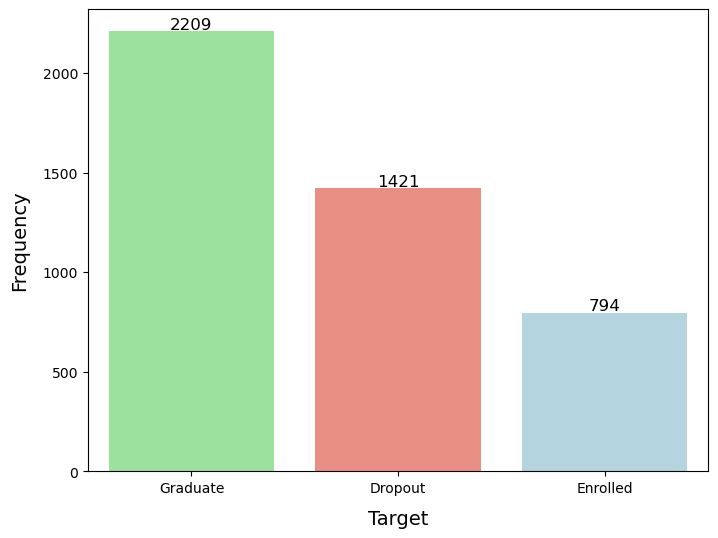

In [35]:
# Define target column and color mapping for classes
target_col = 'target'
color_map = {'Graduate': 'lightgreen', 'Dropout': 'salmon', 'Enrolled': 'lightblue'}

# Get class counts and sort them
value_counts = df[target_col].value_counts(ascending=False)
order = value_counts.index
colors = [color_map.get(val, 'skyblue') for val in order]

# Plot class distribution 
plt.figure(figsize=(8, 6))
ax = sns.countplot(x=target_col, data=df, order=order, palette=colors)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.xlabel('Target', fontsize=14, labelpad=10)
plt.ylabel('Frequency', fontsize=14, labelpad=10)
plt.show()

The class distribution highlights a significant imbalance in the dataset:

- Graduate: Represents 50% of the records (2,209 of 4,424).
- Dropout: Represents 32% of the records (1,421 of 4,424).
- Enrolled: Represents the minority class with only 18% of the records (794 of 4,424).

#### Student Outcomes Grouped by Course 

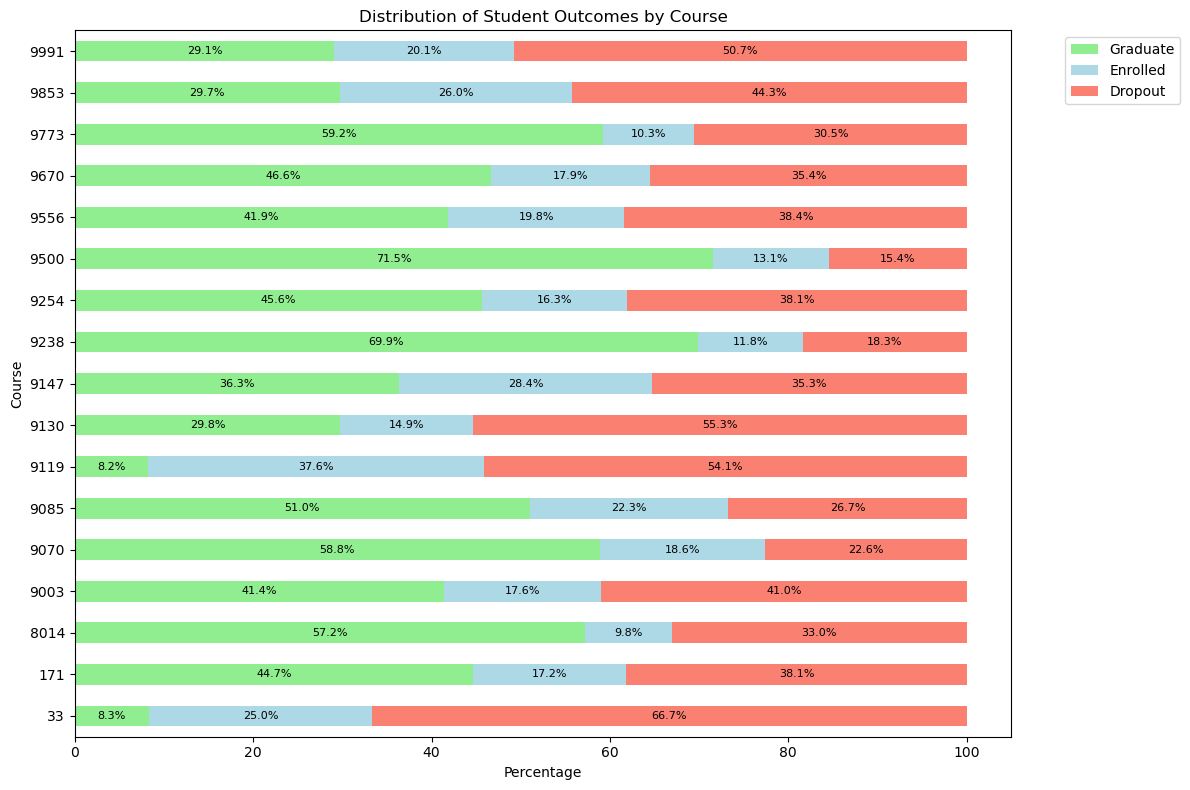

In [38]:
# Set desired order for target classes
order = ['Graduate', 'Enrolled', 'Dropout']

# Calculate outcome counts and percentages by course
outcome_counts_course = df.groupby(['course', target_col]).size().unstack(fill_value=0)
outcome_counts_course = outcome_counts_course[order]  
outcome_percent_course = outcome_counts_course.div(outcome_counts_course.sum(axis=1), axis=0) * 100

# Plot stacked horizontal bar chart
fig, ax = plt.subplots(figsize=(12, 8))
outcome_percent_course.plot(kind='barh', stacked=True, 
                            color=[color_map.get(x, 'gray') for x in outcome_percent_course.columns], ax=ax)

# Adding percentage labels
for i, (index, row) in enumerate(outcome_percent_course.iterrows()):
    xpos = 0
    for outcome in outcome_percent_course.columns:
        val = row[outcome]
        if val > 0:
            ax.text(xpos + val / 2, i, f"{val:.1f}%", va='center', ha='center', fontsize=8)
        xpos += val

ax.set_title('Distribution of Student Outcomes by Course', loc='center')
ax.set_xlabel('Percentage')
ax.set_ylabel('Course')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#### Student Outcomes Grouped by Academic Features

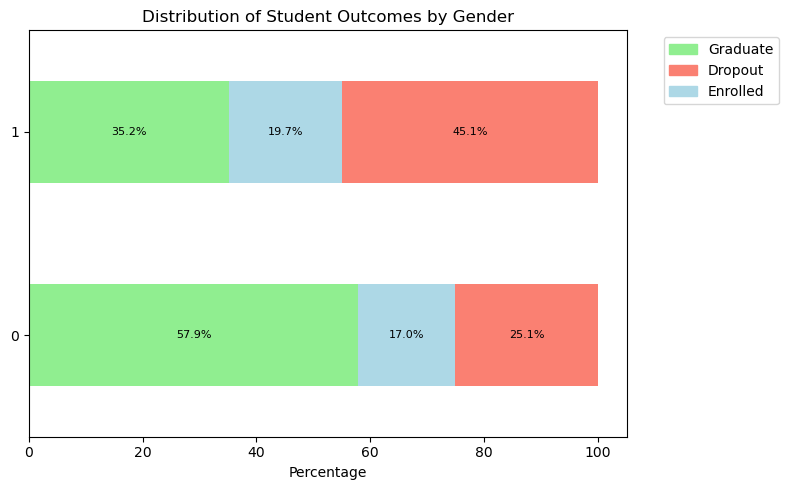

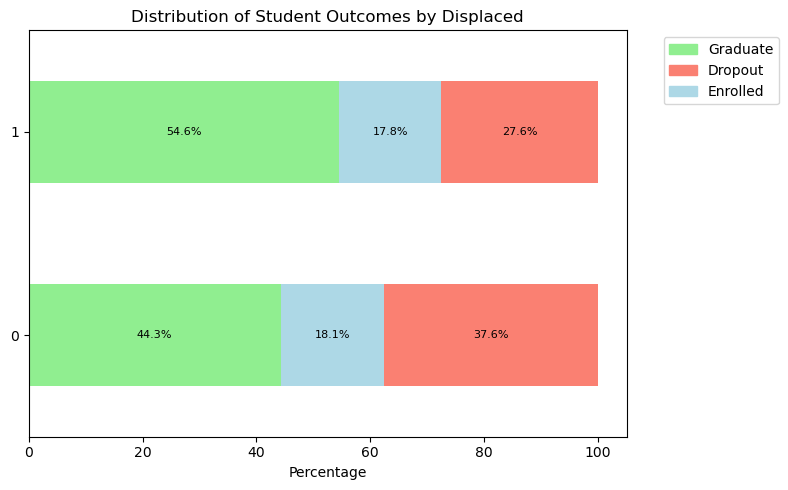

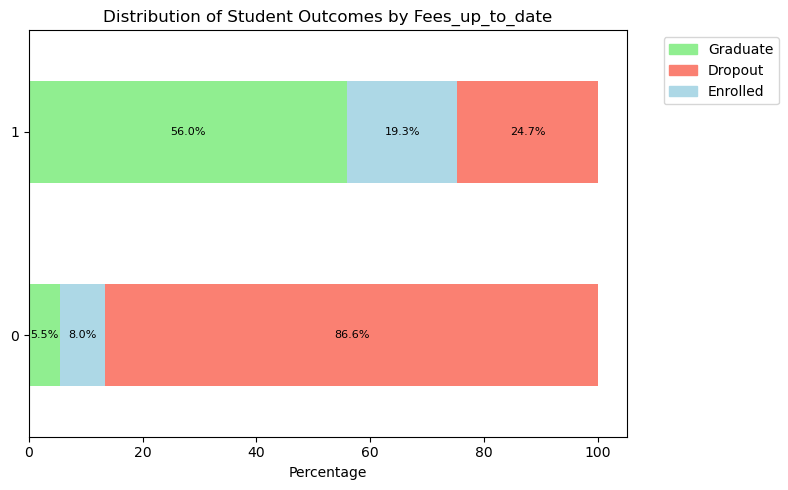

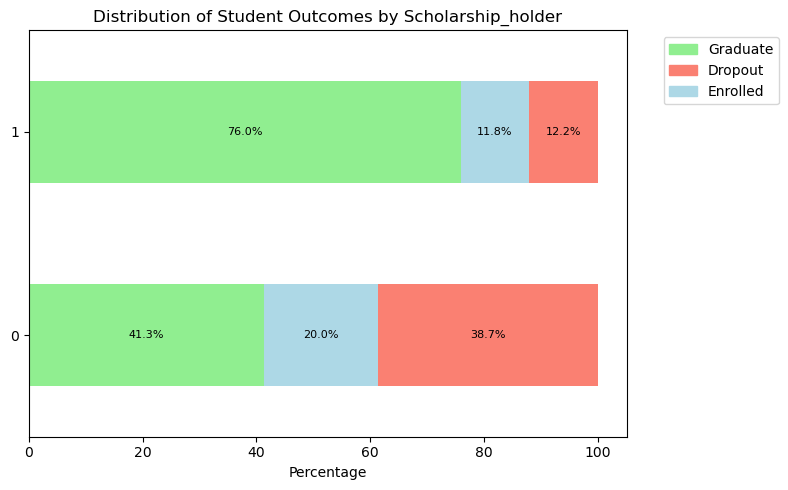

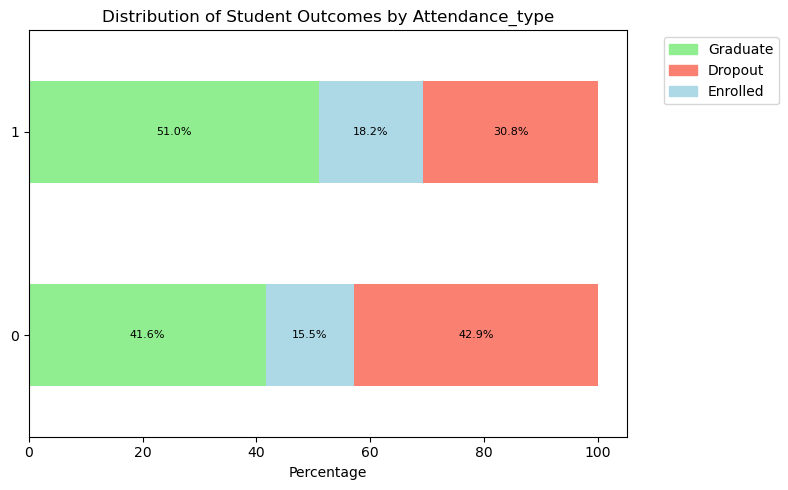

In [40]:
# Define features to analyze against student outcomes
features = ['gender', 'displaced', 'fees_up_to_date', 'scholarship_holder', 'attendance_type']

# Iterate and plot for each feature separately
for feature in features:
    # Grouping and calculating percentages
    outcome_counts = df.groupby([feature, target_col]).size().unstack(fill_value=0)
    outcome_counts = outcome_counts[order] 
    outcome_percent = outcome_counts.div(outcome_counts.sum(axis=1), axis=0) * 100

    # Plotting
    ax = outcome_percent.plot(kind='barh', stacked=True, 
                              color=[color_map.get(x, 'gray') for x in outcome_percent.columns],
                              figsize=(8, 5))

    # Adding percentage labels
    for i, (index, row) in enumerate(outcome_percent.iterrows()):
        xpos = 0
        for outcome in outcome_percent.columns:
            val = row[outcome]
            if val > 0:
                ax.text(xpos + val / 2, i, f"{val:.1f}%", va='center', ha='center', fontsize=8)
            xpos += val

    ax.set_title(f'Distribution of Student Outcomes by {feature.capitalize()}')
    ax.set_xlabel('Percentage')
    ax.set_ylabel('')
    
    # Custom legend
    handles = [plt.Rectangle((0,0),1,1, color=color_map[key]) for key in color_map]
    labels = list(color_map.keys())
    plt.legend(handles, labels, bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.tight_layout()
    plt.show()

The distributions highlight the imbalanced nature of the data when grouping student outcomes by course, gender, displacement status, tuition fee status, scholarship status, and attendance type (daytime or evening).

Student Distribution by Course
- The most successful courses are 9500 (Nursing) and 9238 (Social Service), with 71.5% and 69.9% of students, respectively, completing their degrees within the normal duration.
- In contrast, the science and technology sector shows lower success rates. Courses such as 33 (Biofuel Production Technologies) and 9119 (Informatics Engineering) have the poorest outcomes, with only 8% of students graduating on time. These courses also have higher dropout rates, at 66.7% and 54.1%, respectively. Similarly, the 9130 (Equiniculture) course experiences a dropout rate of 55%.

Student Distribution by Academic Features
- Gender: Female students show higher success rates compared to their male counterparts.
- Scholarship and Tuition Fees: Students who hold scholarships and have their tuition fees up to date are more likely to complete their courses successfully.
- Attendance Type: Students attending daytime classes tend to graduate earlier than those attending evening classes.
- Displacement Status: Students displaced from their homes also show higher rates of completing their courses within the expected duration.

#### Observations 

The imbalance nature of the target variable can lead to biased predictive models, where high overall accuracy is driven by correctly predicting the majority class, but the minority class (Enrolled) suffers from poor performance.

Strategies to Address Class Imbalance

1. Data-Level Approaches: 
- SMOTE (Synthetic Minority Over-sampling Technique): Generates synthetic examples of the minority class by interpolating between existing instances.
- ADASYN (Adaptive Synthetic Sampling): Similar to SMOTE but focuses on generating more synthetic samples for minority class examples that are harder to learn.

Other Techniques to Consider:
- Random Over-Sampling: Duplicates existing minority class samples to balance the dataset.
- Random Under-Sampling: Reduces the number of majority class samples to balance the dataset.

2. Algorithm-Level Approaches: these techniques involve modifying the learning algorithm to account for imbalance.
- Balanced Random Forest: A variant of Random Forest that balances each bootstrap sample.
- Easy Ensemble: An ensemble method that creates multiple balanced subsets by under-sampling the majority class and trains models on each.

Bagging Classifiers with Balancing Techniques:
- Exactly Balanced Bagging: Ensures equal representation of all classes in each subset.
- Roughly Balanced Bagging: Allows slight variations in class distribution in each subset.
- Over-Bagging: Over-samples the minority class within each bagging subset.
- SMOTE-Bagging: Combines bagging with SMOTE to generate balanced subsets.

### Multi-collinearity 

#### Heatmap 

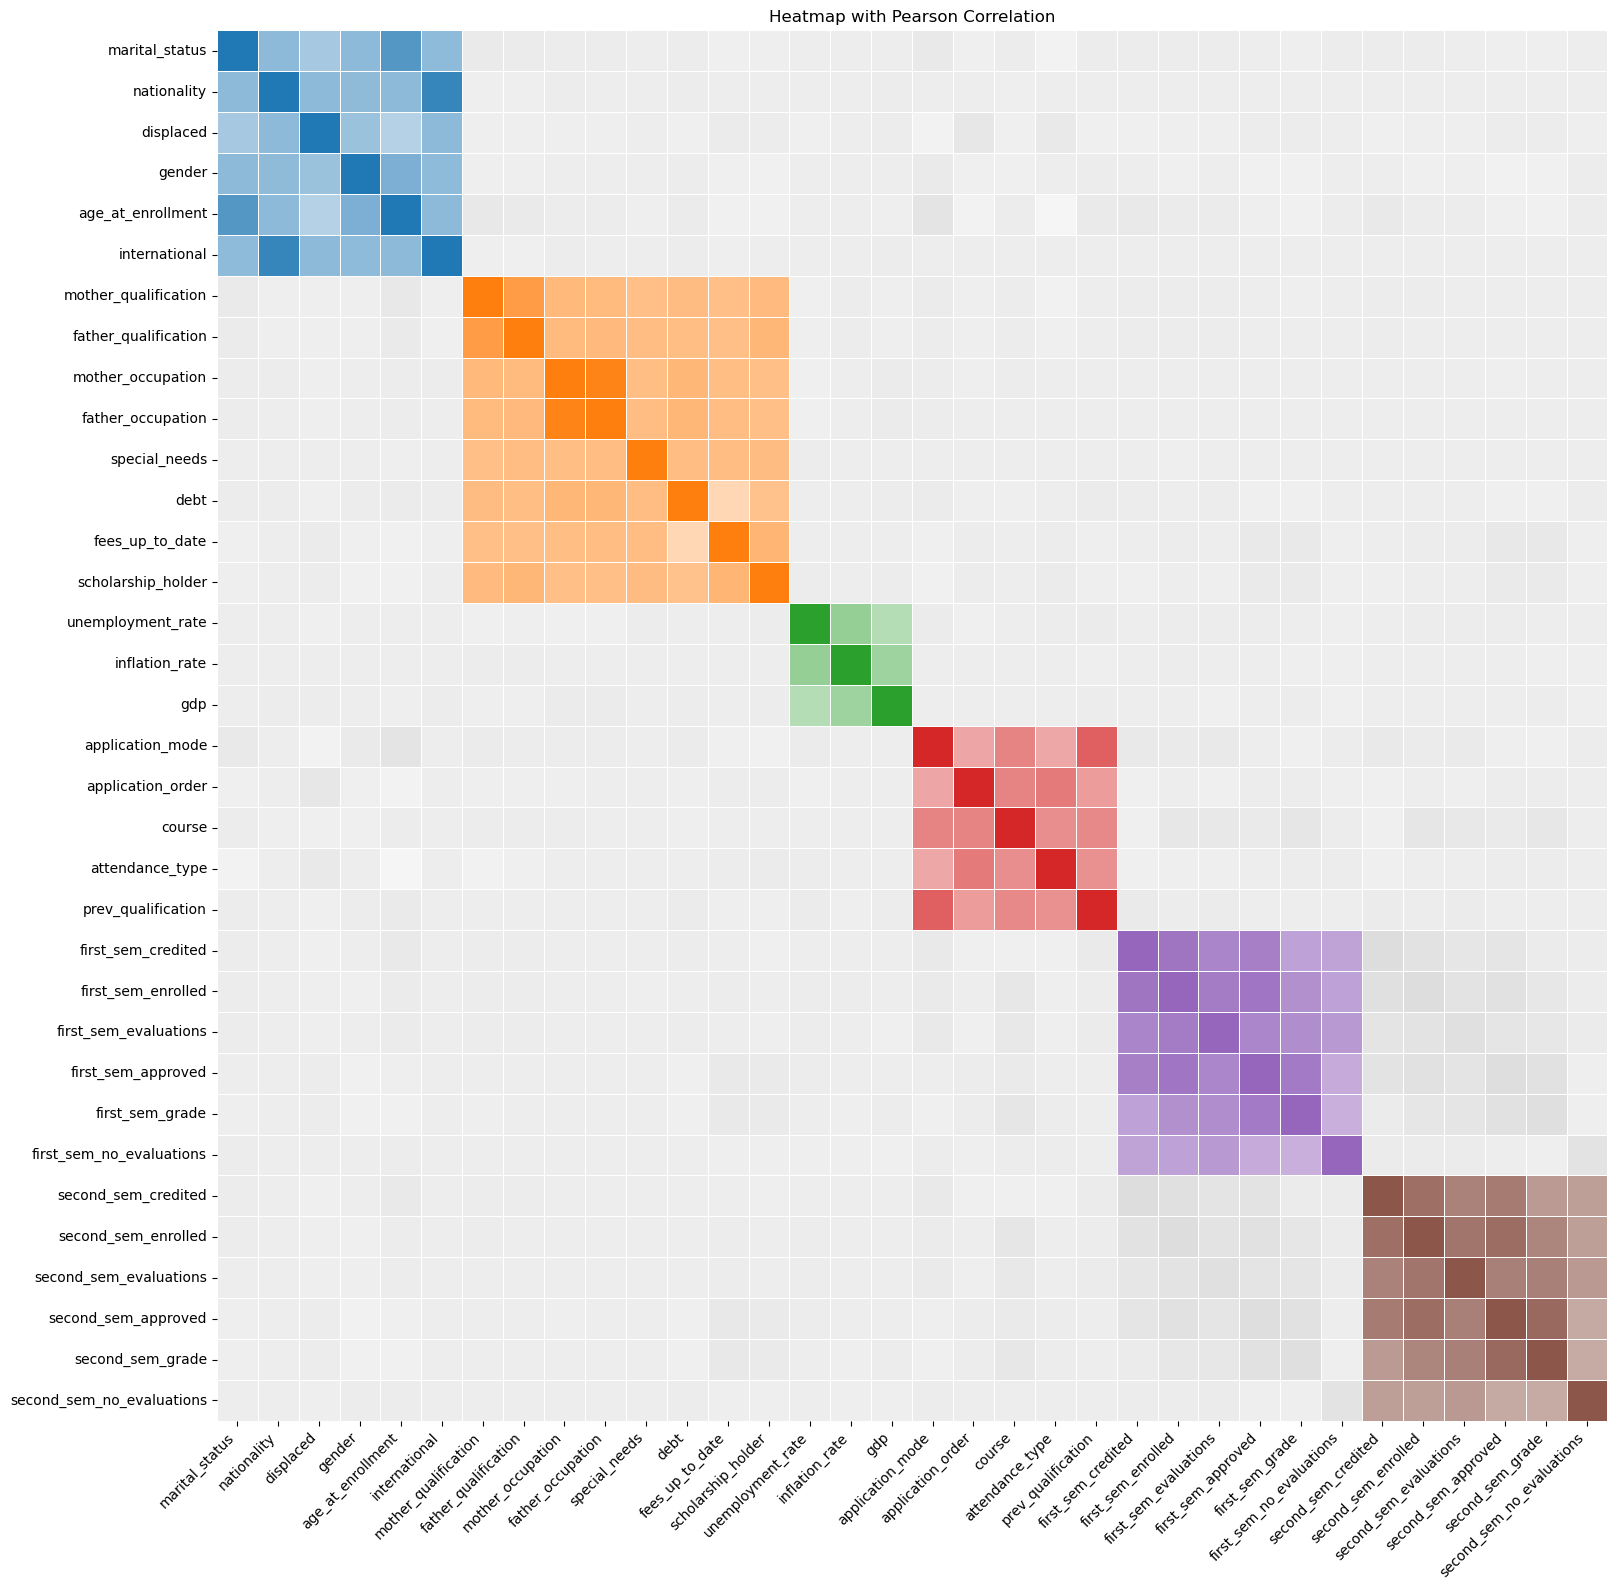

In [46]:
# Mapping features to color groups
feature_groups = {
    'Demographics': features_demo,
    'Socioeconomics': features_socio,
    'Macroeconomics': features_macro,
    'Academics Enrollment': features_acad,
    'Academics 1st Sem': features_acad1,
    'Academics 2nd Sem': features_acad2
}

# Custom color scales for each group
custom_cmaps = {
    'Demographics': LinearSegmentedColormap.from_list('demo_cmap', ['#f9fbfd', '#2078b4']),
    'Socioeconomics': LinearSegmentedColormap.from_list('socio_cmap', ['#fffcfa', '#ff7f0e']),
    'Macroeconomics': LinearSegmentedColormap.from_list('macro_cmap', ['#f9fcf9', '#2ba02d']),
    'Academics Enrollment': LinearSegmentedColormap.from_list('academic_cmap', ['#faeceb', '#d52728']),
    'Academics 1st Sem': LinearSegmentedColormap.from_list('1stsem_cmap', ['#f3edf7', '#9566bc']),
    'Academics 2nd Sem': LinearSegmentedColormap.from_list('2ndsem_cmap', ['#f7f3f2', '#8c564a'])
}

# Background colormap
background_cmap = LinearSegmentedColormap.from_list('background_cmap', ['#fefefe', '#dcdcdc'])

# Select relevant columns
all_features = [feature for group in feature_groups.values() for feature in group]
df_filtered = df[all_features]

# Compute the full correlation matrix
corr = df_filtered.corr(method='pearson')

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(18, 16))

# Plot the full correlation heatmap in the custom background color
sns.heatmap(corr, cmap=background_cmap, center=0,
            square=True, linewidths=.5, cbar=False, annot=False, vmin=-1, vmax=1)

# Consistent color scaling for all group heatmaps
vmin, vmax = -1, 1

# Overlay each group heatmap in its corresponding block with custom colormaps
for group, features in feature_groups.items():
    # Extract the subgroup correlation matrix
    sub_corr = corr.loc[features, features]
    
    # Create a full-size mask and unmask the subgroup's block
    sub_mask = np.ones_like(corr, dtype=bool)
    sub_mask[np.ix_(corr.index.isin(features), corr.columns.isin(features))] = False  # Unmask the subgroup block

    # Apply the group's custom colormap
    cmap = custom_cmaps[group]

    # Overlay the subgroup heatmap onto the main heatmap
    sns.heatmap(corr, mask=sub_mask, cmap=cmap, center=0,
                square=True, linewidths=.5, cbar=False, annot=False,
                vmin=vmin, vmax=vmax)
    
# Make the heatmap square
ax.set_aspect('equal')

# Formatting for better readability
plt.xticks(rotation=45, ha='right')
plt.title('Heatmap with Pearson Correlation')
plt.tight_layout()
plt.show()

Heatmap Color Guide:

- Blues: Demographics features.
- Oranges: Socioeconomics features.
- Greens: Macroeconomics features.
- Reds: Academic Enrollment features.
- Purples: First Semester academic features.
- Browns: Second Semester academic features.
- Grays: Collinearity between different feature groups.

#### Features with Pearson Coefficient more than 0.7

In [49]:
# Extract the upper triangle to avoid duplicate pairs and self-correlation
mask = np.triu(np.ones_like(corr, dtype=bool), k=1)

# Stack the upper triangle correlation values into pairs
high_corr_pairs = corr.where(mask).stack()

# Filter for correlations greater than 0.7
high_corr_df = high_corr_pairs[high_corr_pairs > 0.7].reset_index()
high_corr_df.columns = ['Feature', 'Collinearity with', 'Pearson Coefficient']

# Sort by Pearson correlation in descending order
high_corr_df = high_corr_df.sort_values(by='Pearson Coefficient', ascending=False).reset_index(drop=True)

# Display the sorted DataFrame
print(high_corr_df)

                  Feature       Collinearity with  Pearson Coefficient
0      first_sem_credited     second_sem_credited             0.944811
1      first_sem_enrolled     second_sem_enrolled             0.942627
2       mother_occupation       father_occupation             0.910472
3      first_sem_approved     second_sem_approved             0.904002
4         first_sem_grade        second_sem_grade             0.837170
5             nationality           international             0.790935
6   first_sem_evaluations  second_sem_evaluations             0.778863
7      first_sem_credited      first_sem_enrolled             0.774344
8      first_sem_enrolled      first_sem_approved             0.769083
9     second_sem_approved        second_sem_grade             0.760804
10     first_sem_enrolled     second_sem_credited             0.753747
11     first_sem_approved     second_sem_enrolled             0.733772
12    second_sem_enrolled     second_sem_approved             0.703258


We notice strong correlations, particularly within the same groups—such as "Nationality" and "International" or "Mother’s occupation" and "Father’s occupation". 

Additionally, strong correlations are observed between groups, especially in features related to academic performance across semesters. For instance, "Curricular units 1st sem (approved)" is highly correlated with "Curricular units 2nd sem (approved)", reflecting performance continuity from the first to the second semester.

I am planning on keeping all the features. 

### Feature Importance

Feature importance is crucial for understanding data, improving models, and reducing bias by eliminating irrelevant features. The most important features can vary based on the method and algorithm used. 
A common technique is Permutation Feature Importance, which measures importance by observing changes in model error when a feature's values are permuted. 
A significant change in error indicates the feature's importance to the model.

#### Data Preparation for Catboost and LightGBM

In [54]:
from sklearn.model_selection import train_test_split

# categorical features
categorical_features = [
       'marital_status', 'application_mode', 'application_order', 'course',
       'attendance_type', 'prev_qualification', 'nationality', 
       'mother_qualification', 'father_qualification',
       'mother_occupation', 'father_occupation', 'displaced', 
       'special_needs', 'debt', 'fees_up_to_date', 'gender',
       'scholarship_holder', 'international'
    ]

# Preparing data
X = df.drop(columns=['target'])
y = df['target']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

#### Catboost 

In [56]:
from catboost import CatBoostClassifier
from sklearn.inspection import permutation_importance
from sklearn.metrics import f1_score

# Initializing CatBoost
model_cb = CatBoostClassifier(cat_features=categorical_features, random_state=42, verbose=0)

# Training the model
model_cb.fit(X_train, y_train)

# Predictions and evaluation
y_pred = model_cb.predict(X_test)
f1 = f1_score(y_test, y_pred, average='macro')
print(f'F1 Score (Macro): {f1:.4f}')

# Permutation Feature Importance for CatBoost
pfi_result = permutation_importance(model_cb, X_test, y_test, scoring='f1_macro', n_repeats=10, random_state=42)
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': pfi_result.importances_mean
}).sort_values(by='Importance', ascending=False).reset_index(drop=True)

# Display the top 10 important features
print(importance_df.head(10))

F1 Score (Macro): 0.7052
                  Feature  Importance
0     second_sem_approved    0.175237
1         fees_up_to_date    0.035419
2      first_sem_approved    0.029966
3  second_sem_evaluations    0.018883
4     second_sem_enrolled    0.015957
5                    debt    0.010832
6                  course    0.009488
7       mother_occupation    0.008208
8   first_sem_evaluations    0.008097
9       application_order    0.006444


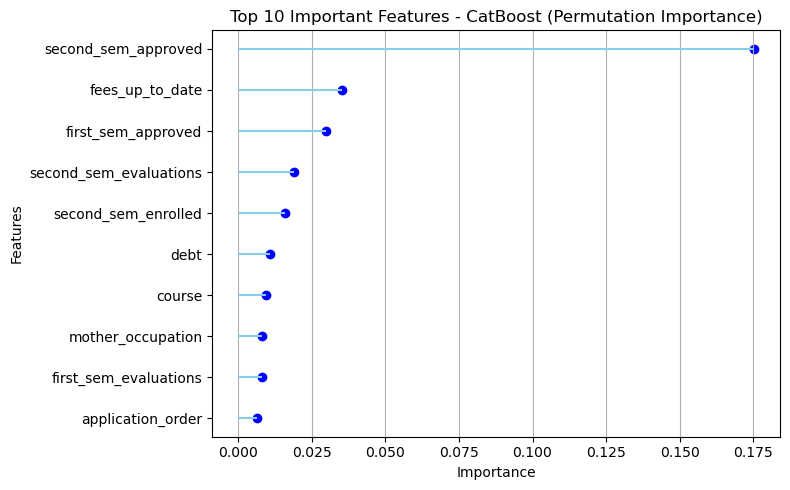

In [57]:
# Visualizing the top 10 important features using a dot plot with connecting lines

top_features = importance_df.head(10).sort_values(by='Importance', ascending=True)
plt.figure(figsize=(8, 5))
plt.hlines(y=top_features['Feature'], xmin=0, xmax=top_features['Importance'], color='skyblue')
plt.scatter(top_features['Importance'], top_features['Feature'], color='blue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Top 10 Important Features - CatBoost (Permutation Importance)')
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()

#### LightGBM

In [59]:
from lightgbm import LGBMClassifier

# Initializing LightGBM
model_lgbm = LGBMClassifier(random_state=42)

# Training the model
model_lgbm.fit(X_train, y_train, categorical_feature=categorical_features)

# Predictions and evaluation
y_pred = model_lgbm.predict(X_test)
f1 = f1_score(y_test, y_pred, average='macro')
print(f'F1 Score (Macro): {f1:.4f}')

# Permutation Feature Importance for LightGBM
pfi_result = permutation_importance(model_lgbm, X_test, y_test, scoring='f1_macro', n_repeats=10, random_state=42)
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': pfi_result.importances_mean
}).sort_values(by='Importance', ascending=False).reset_index(drop=True)

# Display the top 10 important features
print(importance_df.head(10))

[LightGBM] [Warning] Met categorical feature which contains sparse values. Consider renumbering to consecutive integers started from zero
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001190 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1260
[LightGBM] [Info] Number of data points in the train set: 3096, number of used features: 36
[LightGBM] [Info] Start training from score -1.136129
[LightGBM] [Info] Start training from score -1.717098
[LightGBM] [Info] Start training from score -0.694440
F1 Score (Macro): 0.7068
                  Feature  Importance
0     second_sem_approved    0.186253
1         fees_up_to_date    0.043003
2      first_sem_approved    0.033436
3  second_sem_evaluations    0.020244
4                  course    0.018371
5   first_sem_evaluations    0.015498
6       father_occupation    0.013569
7                  

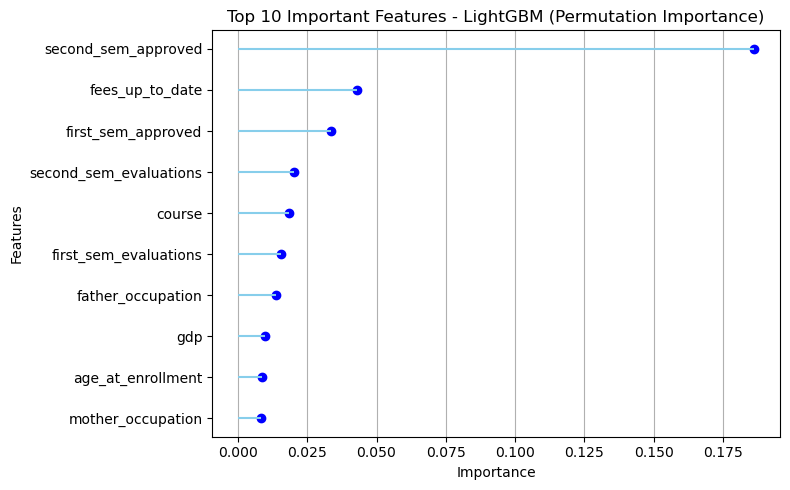

In [60]:
# Visualizing the top 10 important features using a dot plot with connecting lines
top_features = importance_df.head(10).sort_values(by='Importance', ascending=True)
plt.figure(figsize=(8, 5))
plt.hlines(y=top_features['Feature'], xmin=0, xmax=top_features['Importance'], color='skyblue')
plt.scatter(top_features['Importance'], top_features['Feature'], color='blue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Top 10 Important Features - LightGBM (Permutation Importance)')
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()

#### Data Preparation for XGBoost and Random Forest 

In [62]:
from sklearn.preprocessing import LabelEncoder

# Encoding the target variable for XGBoost
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, stratify=y_encoded, random_state=42)

#### XGBoost

In [64]:
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline

model_xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')
model_xgb.fit(X_train, y_train)

y_pred_xgb = model_xgb.predict(X_test)
f1_xgb = f1_score(y_test, y_pred_xgb, average='macro')
print(f'F1 Score (Macro) - XGBoost: {f1_xgb:.4f}')

# Manual Permutation Importance for XGBoost
baseline_score = f1_xgb
importances = []
for col in X_test.columns:
    X_permuted = X_test.copy()
    X_permuted[col] = np.random.permutation(X_permuted[col])
    y_pred_permuted = model_xgb.predict(X_permuted)
    permuted_score = f1_score(y_test, y_pred_permuted, average='macro')
    importance = baseline_score - permuted_score
    importances.append(importance)

importance_df_xgb = pd.DataFrame({
    'Feature': X_test.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False).reset_index(drop=True)

print('\nTop 10 Important Features - XGBoost')
print(importance_df_xgb.head(10))

F1 Score (Macro) - XGBoost: 0.7112

Top 10 Important Features - XGBoost
                  Feature  Importance
0     second_sem_approved    0.181773
1         fees_up_to_date    0.055994
2      first_sem_approved    0.047634
3  second_sem_evaluations    0.021907
4   first_sem_evaluations    0.021181
5       mother_occupation    0.019952
6                    debt    0.018607
7      first_sem_enrolled    0.012472
8     second_sem_enrolled    0.011336
9               displaced    0.010730


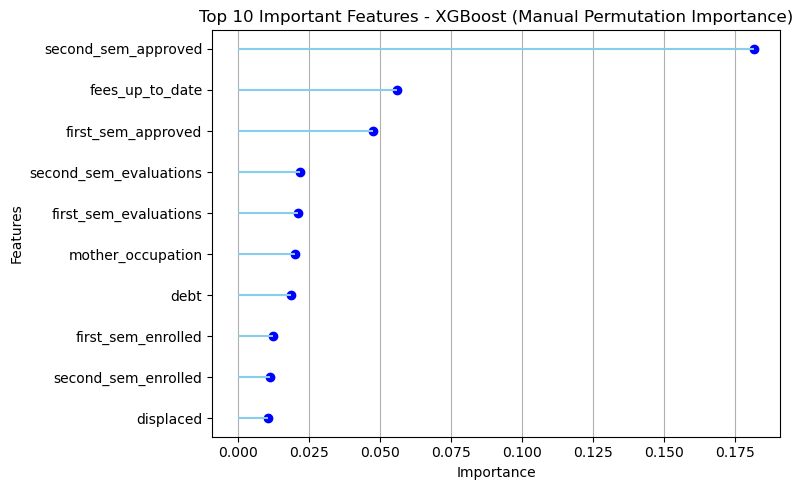

In [65]:
# Visualizing Top 10 features
top_features_xgb = importance_df_xgb.head(10).sort_values(by='Importance', ascending=True)
plt.figure(figsize=(8, 5))
plt.hlines(y=top_features_xgb['Feature'], xmin=0, xmax=top_features_xgb['Importance'], color='skyblue')
plt.scatter(top_features_xgb['Importance'], top_features_xgb['Feature'], color='blue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Top 10 Important Features - XGBoost (Manual Permutation Importance)')
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()

#### Random Forest 

In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance

# Train a Random Forest classifier
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)

# Make predictions and evaluate using macro-averaged F1 score
y_pred_rf = model_rf.predict(X_test)
f1_rf = f1_score(y_test, y_pred_rf, average='macro')
print(f'F1 Score (Macro) - Random Forest: {f1_rf:.4f}')

# Perform permutation feature importance (PFI) analysis
pfi_result_rf = permutation_importance(model_rf, X_test, y_test, scoring='f1_macro', n_repeats=10, random_state=42)
importance_df_rf = pd.DataFrame({
    'Feature': X.columns,
    'Importance': pfi_result_rf.importances_mean
}).sort_values(by='Importance', ascending=False).reset_index(drop=True)

# Display top 10 most important features
print('\nTop 10 Important Features - Random Forest')
print(importance_df_rf.head(10))

F1 Score (Macro) - Random Forest: 0.6940

Top 10 Important Features - Random Forest
                 Feature  Importance
0    second_sem_approved    0.121039
1        fees_up_to_date    0.042365
2     first_sem_approved    0.021669
3       second_sem_grade    0.017207
4      age_at_enrollment    0.012520
5      mother_occupation    0.011889
6    second_sem_enrolled    0.009612
7                 course    0.007886
8  first_sem_evaluations    0.007309
9       application_mode    0.006529


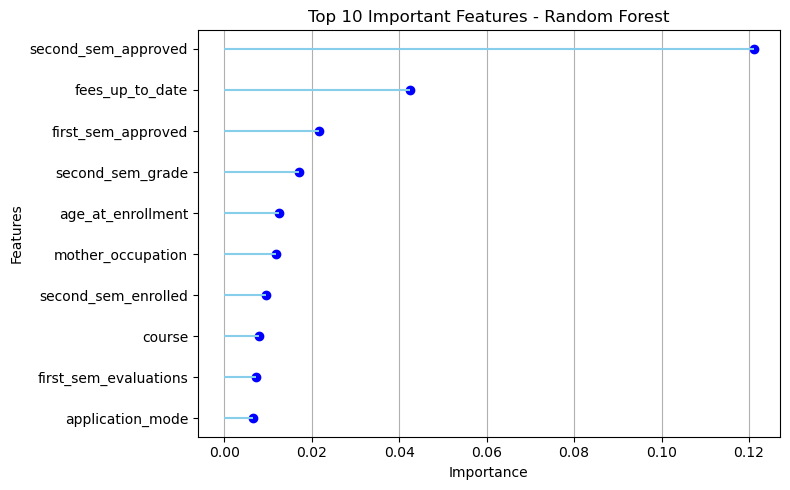

In [68]:
# Visualizing the top 10 features 
top_features_rf = importance_df_rf.head(10).sort_values(by='Importance', ascending=True)
plt.figure(figsize=(8, 5))
plt.hlines(y=top_features_rf['Feature'], xmin=0, xmax=top_features_rf['Importance'], color='skyblue')
plt.scatter(top_features_rf['Importance'], top_features_rf['Feature'], color='blue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Top 10 Important Features - Random Forest')
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()

#### Obervations 

- Across all models, second_sem_approved consistently emerged as the most important feature, significantly impacting model predictions.
- fees_up_to_date and first_sem_approved were also key predictors across all models.
- course, mother_occupation, and father_occupation appeared as important features in most models.
- XGBoost highlighted additional features like admission_grade and debt, while Random Forest emphasized second_sem_grade and age_at_enrollment.
- The F1 Macro Score was consistent across models, around 0.7068, indicating balanced performance on imbalanced data.